In [1]:
import tensorflow as tf #pip install tensorflow

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

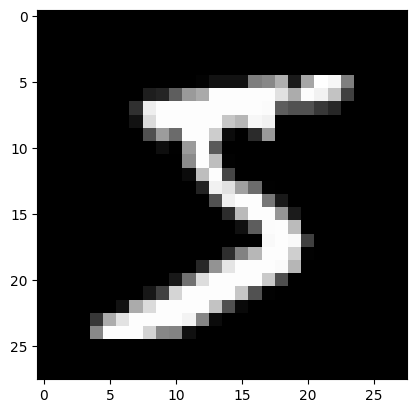

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

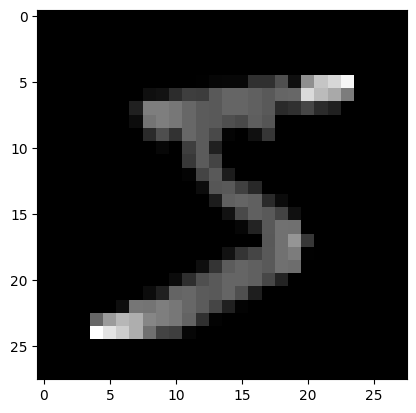

In [7]:
#Normalize the values between 0 and 255
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

In [8]:
#Post normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
import numpy as np
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print('Training Samples dimension: ', x_train.shape)
print('Testing Samples dimension:', x_test.shape)

Training Samples dimension:  (60000, 28, 28, 1)
Testing Samples dimension: (10000, 28, 28, 1)


In [12]:
def build_model(hp):
    model = Sequential()

    # First convolution layer
    model.add(Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        input_shape=x_train.shape[1:]
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolution layer
    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [13]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [14]:
#Hyper-parameter tuning using Random Search
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='mnist_tuning',
    project_name='mnist'
)

# Print a summary of the search space
tuner.search_space_summary()

# Perform the hyperparameter search
tuner.search(x_train, y_train, epochs=3, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print a summary of the best model
best_model.summary()

Trial 5 Complete [00h 01m 05s]
val_accuracy: 0.9871666431427002

Best val_accuracy So Far: 0.9871666431427002
Total elapsed time: 00h 04m 20s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          102432    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)      

In [15]:
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0322 - accuracy: 0.9906
Test loss: 0.03220444172620773
Test accuracy: 0.9905999898910522


313/313 [==============================] - 1s 4ms/step
Predictions for the test set:
[[1.38137235e-08 3.20235330e-07 8.64692720e-06 ... 9.99974787e-01
  2.78424750e-06 4.44579982e-08]
 [4.41825478e-06 5.34526316e-06 9.99990046e-01 ... 1.98952925e-08
  8.49503508e-08 1.92450916e-10]
 [5.17556657e-07 9.99946535e-01 1.86323931e-07 ... 2.54428251e-05
  5.83425754e-06 2.58213646e-07]
 ...
 [9.77328353e-13 6.97103708e-09 1.85474094e-10 ... 3.53859839e-08
  2.25353833e-08 7.22245508e-09]
 [3.73573198e-06 5.65418379e-09 1.87294247e-09 ... 5.29786159e-10
  4.88860605e-05 1.28690360e-07]
 [1.01309340e-03 2.57892509e-07 1.98882641e-04 ... 1.74794348e-08
  8.88633531e-06 1.66368011e-06]]
Enter the sample index: 128
Prediction for test sample at index 128 : 8


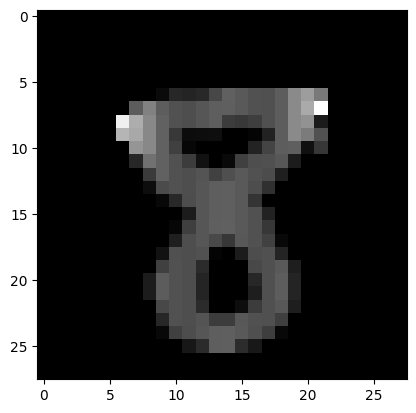

In [16]:
predictions = best_model.predict(x_test)
print("Predictions for the test set:")
print(predictions)

# Predict for a specific sample
sample_index = int(input("Enter the sample index: "))
print("Prediction for test sample at index", sample_index, ":", np.argmax(predictions[sample_index]))

# Display the specific sample
plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')
plt.show()